In [13]:
import numpy as np
import pandas as pd
from utils import generate_random_sales

Data=pd.date_range(start='2025-01-01' , end= '2025-12-01',freq='MS')

product_A =generate_random_sales(50,100,12)
product_B =generate_random_sales(30,80,12)
product_C =generate_random_sales(20,60,12)
product_D =generate_random_sales(10,50,12)


dataFrame = pd.DataFrame({
    'DATA' : Data ,
    'Product_A' :  product_A ,
    'Product_B' :  product_B ,
    'Product_C' :  product_C ,
    'Product_D' :  product_D 

})

dataFrame.to_csv('data/initial.csv',index=False)


In [16]:
dataFrame

,DATA,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,55,50,57,32
1,2025-02-01,63,58,41,32
2,2025-03-01,93,31,34,11
3,2025-04-01,61,65,59,36
4,2025-05-01,58,43,33,10
5,2025-06-01,76,37,36,34
6,2025-07-01,100,55,47,15
7,2025-08-01,67,34,39,23
8,2025-09-01,65,35,34,49
9,2025-10-01,86,72,36,19


In [17]:
dataFrame['Total_sales'] = dataFrame[['Product_A' , 'Product_B' , 'Product_C' , 'Product_D']].sum(axis=1)

In [18]:
dataFrame['Total_sales']

0     194
1     194
2     169
3     221
4     144
5     183
6     217
7     163
8     183
9     213
10    209
11    218
Name: Total_sales, dtype: int64

In [20]:
dataFrame['Average_sales']=dataFrame[['Product_A' , 'Product_B' , 'Product_C' , 'Product_D']].mean(axis=1)
dataFrame['Average_sales']

0     48.50
1     48.50
2     42.25
3     55.25
4     36.00
5     45.75
6     54.25
7     40.75
8     45.75
9     53.25
10    52.25
11    54.50
Name: Average_sales, dtype: float64

In [22]:
dataFrame['Month_over_Month_Growth']=dataFrame['Total_sales'].pct_change()*100
dataFrame['Month_over_Month_Growth']

0           NaN
1      0.000000
2    -12.886598
3     30.769231
4    -34.841629
5     27.083333
6     18.579235
7    -24.884793
8     12.269939
9     16.393443
10    -1.877934
11     4.306220
Name: Month_over_Month_Growth, dtype: float64

In [23]:
dataFrame['Month'] = pd.to_datetime(dataFrame['DATA']).dt.month
dataFrame['Quarter'] = pd.cut(
    dataFrame['Month'], 
    bins=[0,3,6,9,12], 
    labels=['Q1','Q2','Q3','Q4']
)

In [25]:
dataFrame

,DATA,Product_A,Product_B,Product_C,Product_D,Total_sales,Average_sales,Month_over_Month_Growth,Month,Quarter
0,2025-01-01,55,50,57,32,194,48.50,NaN,1,Q1
1,2025-02-01,63,58,41,32,194,48.50,0.000000,2,Q1
2,2025-03-01,93,31,34,11,169,42.25,-12.886598,3,Q1
3,2025-04-01,61,65,59,36,221,55.25,30.769231,4,Q2
4,2025-05-01,58,43,33,10,144,36.00,-34.841629,5,Q2
5,2025-06-01,76,37,36,34,183,45.75,27.083333,6,Q2
6,2025-07-01,100,55,47,15,217,54.25,18.579235,7,Q3
7,2025-08-01,67,34,39,23,163,40.75,-24.884793,8,Q3
8,2025-09-01,65,35,34,49,183,45.75,12.269939,9,Q3
9,2025-10-01,86,72,36,19,213,53.25,16.393443,10,Q4


In [27]:
dataFrame['Max_Sales_Product']=dataFrame[['Product_A' , 'Product_B','Product_C' , 'Product_D']].idxmax(axis=1)
dataFrame['Min_Sales_Product']=dataFrame[['Product_A' , 'Product_B','Product_C' , 'Product_D']].idxmin(axis=1)
dataFrame

,DATA,Product_A,Product_B,Product_C,Product_D,Total_sales,Average_sales,Month_over_Month_Growth,Month,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,55,50,57,32,194,48.50,NaN,1,Q1,Product_C,Product_D
1,2025-02-01,63,58,41,32,194,48.50,0.000000,2,Q1,Product_A,Product_D
2,2025-03-01,93,31,34,11,169,42.25,-12.886598,3,Q1,Product_A,Product_D
3,2025-04-01,61,65,59,36,221,55.25,30.769231,4,Q2,Product_B,Product_D
4,2025-05-01,58,43,33,10,144,36.00,-34.841629,5,Q2,Product_A,Product_D
5,2025-06-01,76,37,36,34,183,45.75,27.083333,6,Q2,Product_A,Product_D
6,2025-07-01,100,55,47,15,217,54.25,18.579235,7,Q3,Product_A,Product_D
7,2025-08-01,67,34,39,23,163,40.75,-24.884793,8,Q3,Product_A,Product_D
8,2025-09-01,65,35,34,49,183,45.75,12.269939,9,Q3,Product_A,Product_C
9,2025-10-01,86,72,36,19,213,53.25,16.393443,10,Q4,Product_A,Product_D


In [28]:
dataFrame.to_csv('data/final.csv',index=False)

In [29]:
pivot_avg = dataFrame.pivot_table(
    index='Quarter',
    values=['Product_A','Product_B','Product_C','Product_D','Total_sales'],
    aggfunc='mean'
)

pivot_avg

C:\Users\PC\AppData\Local\Temp\ipykernel_14908\586962602.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_avg = dataFrame.pivot_table(


,Product_A,Product_B,Product_C,Product_D,Total_sales
Quarter,,,,,
Q1,70.333333,46.333333,44.000000,25.000000,185.666667
Q2,65.000000,48.333333,42.666667,26.666667,182.666667
Q3,77.333333,41.333333,40.000000,29.000000,187.666667
Q4,84.666667,58.333333,40.333333,30.000000,213.333333


In [31]:
pivot_total=dataFrame.pivot_table(
     index='Quarter',
    values=['Total_sales'],
    aggfunc='sum'
)
pivot_total

C:\Users\PC\AppData\Local\Temp\ipykernel_14908\2080100924.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_total=dataFrame.pivot_table(


,Total_sales
Quarter,
Q1,557
Q2,548
Q3,563
Q4,640


In [32]:
dataFrame

,DATA,Product_A,Product_B,Product_C,Product_D,Total_sales,Average_sales,Month_over_Month_Growth,Month,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,55,50,57,32,194,48.50,NaN,1,Q1,Product_C,Product_D
1,2025-02-01,63,58,41,32,194,48.50,0.000000,2,Q1,Product_A,Product_D
2,2025-03-01,93,31,34,11,169,42.25,-12.886598,3,Q1,Product_A,Product_D
3,2025-04-01,61,65,59,36,221,55.25,30.769231,4,Q2,Product_B,Product_D
4,2025-05-01,58,43,33,10,144,36.00,-34.841629,5,Q2,Product_A,Product_D
5,2025-06-01,76,37,36,34,183,45.75,27.083333,6,Q2,Product_A,Product_D
6,2025-07-01,100,55,47,15,217,54.25,18.579235,7,Q3,Product_A,Product_D
7,2025-08-01,67,34,39,23,163,40.75,-24.884793,8,Q3,Product_A,Product_D
8,2025-09-01,65,35,34,49,183,45.75,12.269939,9,Q3,Product_A,Product_C
9,2025-10-01,86,72,36,19,213,53.25,16.393443,10,Q4,Product_A,Product_D


In [34]:
with open('data/output.csv', 'w') as f:
    f.write('Average Sales per Quarter\n\n')
    pivot_avg.to_csv(f)
    f.write('\nTotal Sales per Quarter\n\n')
    pivot_total.to_csv(f)


In [36]:
best_month_index=dataFrame['Total_sales'].idxmax()
best_month_index

dataFrame.loc[best_month_index ,'DATA']

Timestamp('2025-04-01 00:00:00')

In [37]:
product_totals = dataFrame[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum()

best_product = product_totals.idxmax()
best_product_sales = product_totals.max()

print(best_product, best_product_sales)


Product_A 892


In [38]:
best_quarter = pivot_total['Total_sales'].idxmax()
best_quarter

'Q4'

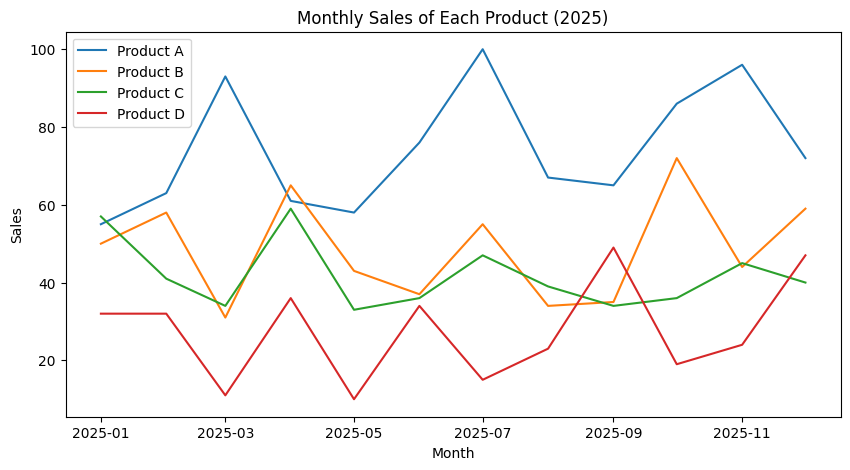

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))  # create the figure first

sns.lineplot(data=dataFrame, x='DATA', y='Product_A', label='Product A')
sns.lineplot(data=dataFrame, x='DATA', y='Product_B', label='Product B')
sns.lineplot(data=dataFrame, x='DATA', y='Product_C', label='Product C')
sns.lineplot(data=dataFrame, x='DATA', y='Product_D', label='Product D')

plt.title("Monthly Sales of Each Product (2025)")  # add the title after plotting
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()


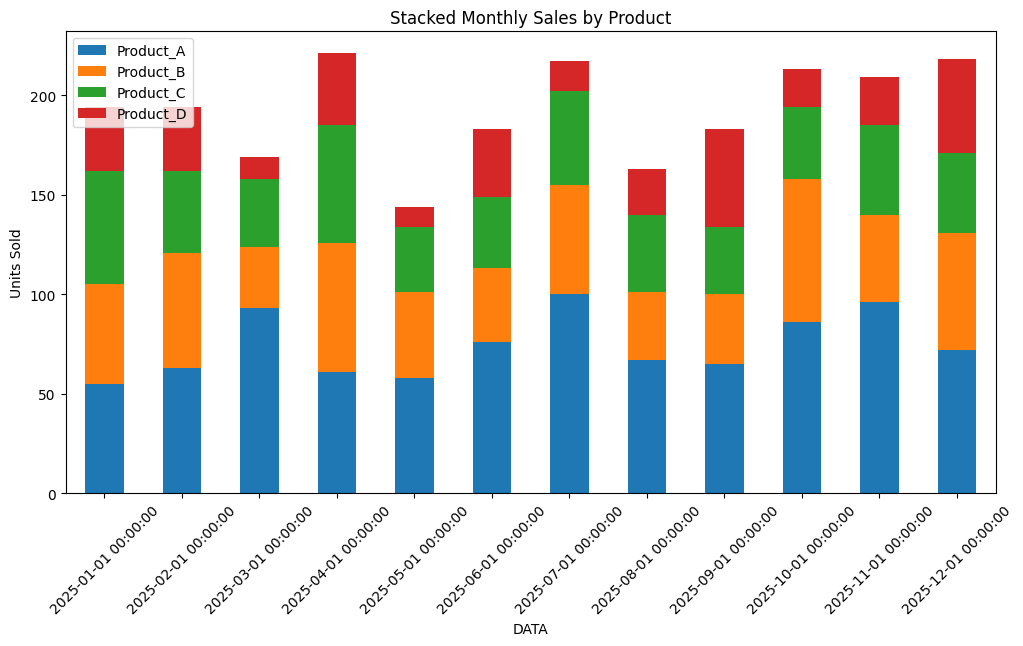

In [42]:
import matplotlib.pyplot as plt

# Select product columns
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

# Plot stacked bar chart
dataFrame.plot(x='DATA', y=products, kind='bar', stacked=True, figsize=(12,6))


plt.title('Stacked Monthly Sales by Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()


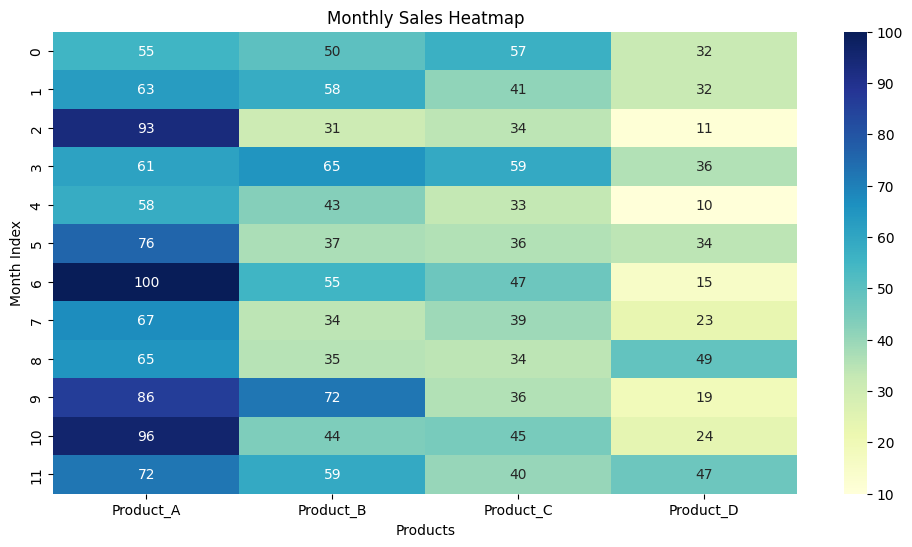

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(dataFrame[['Product_A','Product_B','Product_C','Product_D']],
            annot=True, fmt="d", cmap="YlGnBu")
plt.title('Monthly Sales Heatmap')
plt.xlabel('Products')
plt.ylabel('Month Index')
plt.show()


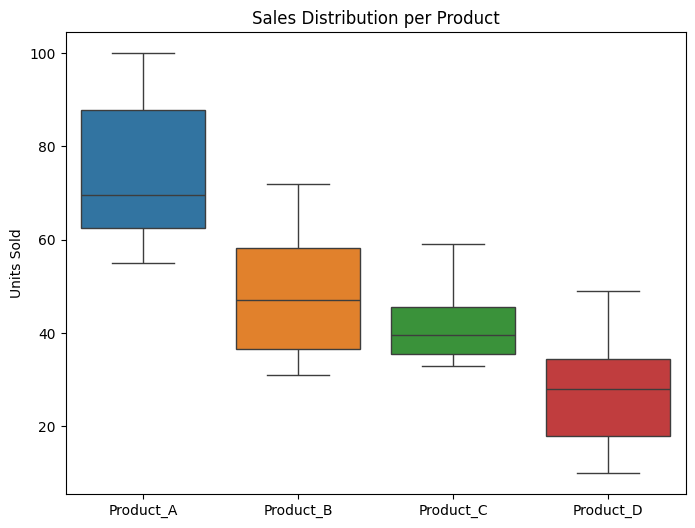

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(data=dataFrame[['Product_A','Product_B','Product_C','Product_D']])
plt.title('Sales Distribution per Product')
plt.ylabel('Units Sold')
plt.show()
